In [62]:
import pandas as pd
import numpy as np


In [63]:
df=pd.read_csv('/content/news.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [65]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [66]:
x=df['title'].values
y=df['label'].values
x



array(['You Can Smell Hillary’s Fear',
       'Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)',
       'Kerry to go to Paris in gesture of sympathy', ...,
       'Anti-Trump Protesters Are Tools of the Oligarchy     : Information',
       'In Ethiopia, Obama seeks progress on peace, security in East Africa',
       "Jeb Bush Is Suddenly Attacking Trump. Here's Why That Matters"],
      dtype=object)

In [67]:
y

array(['FAKE', 'FAKE', 'REAL', ..., 'FAKE', 'REAL', 'REAL'], dtype=object)

In [68]:
df['title']

0                            You Can Smell Hillary’s Fear
1       Watch The Exact Moment Paul Ryan Committed Pol...
2             Kerry to go to Paris in gesture of sympathy
3       Bernie supporters on Twitter erupt in anger ag...
4        The Battle of New York: Why This Primary Matters
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: title, Length: 6335, dtype: object

In [69]:
df.shape

(6335, 4)

In [70]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

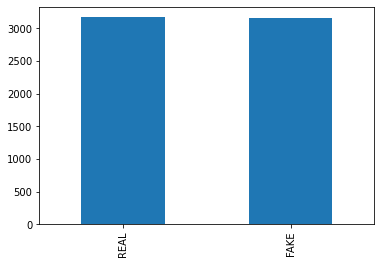

In [71]:
df['label'].value_counts().plot(kind='bar')


In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=0)

In [73]:
X_train.shape

(4751,)

In [74]:
X_test.shape

(1584,)

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
vect=CountVectorizer(stop_words='english')
X_train_vect=vect.fit_transform(X_train)
X_test_vect=vect.transform(X_test)

In [77]:
#Method1
from sklearn.svm import SVC
model1=SVC()
model1.fit(X_train_vect,Y_train)
Y_pred1=model1.predict(X_test_vect)
Y_pred1

array(['REAL', 'REAL', 'FAKE', ..., 'REAL', 'REAL', 'FAKE'], dtype=object)

In [78]:
Y_test

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred1,Y_test)

0.8200757575757576

In [80]:
#Method 2
from sklearn.pipeline import make_pipeline
model2=make_pipeline(CountVectorizer(),SVC())
model2.fit(X_train,Y_train)
Y_pred2=model2.predict(X_test)
Y_pred2

array(['REAL', 'REAL', 'FAKE', ..., 'FAKE', 'REAL', 'FAKE'], dtype=object)

In [81]:
Y_test

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred2,Y_test)

0.8036616161616161

In [83]:
#Method 3
from sklearn.naive_bayes import MultinomialNB
model3=MultinomialNB()
model3.fit(X_train_vect,Y_train)
Y_pred3=model3.predict(X_test_vect)
Y_pred3

array(['REAL', 'REAL', 'FAKE', ..., 'REAL', 'REAL', 'FAKE'], dtype='<U4')

In [84]:
Y_test

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred3,Y_test)

0.8093434343434344

In [86]:
#Method 4
from sklearn.pipeline import make_pipeline
model4=make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(X_train,Y_train)
Y_pred4=model4.predict(X_test)
Y_pred4

array(['REAL', 'REAL', 'FAKE', ..., 'REAL', 'REAL', 'FAKE'], dtype='<U4')

In [87]:
Y_test

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred4,Y_test)

0.8080808080808081

In [89]:
# SVC Model Accuracy                   = 0.8200757575757576
# SVC pipeline Accuracy                = 0.8036616161616161
# MultinomialNB Model Accuracy         = 0.8093434343434344
# MultinomialNB pipeline Accuracy      = 0.8080808080808081

In [90]:
import joblib
joblib.dump(model4,'fake-real')

['fake-real']

In [91]:
import joblib
text_model = joblib.load('fake-real')

In [92]:
text_model.predict(["You Can Smell Hillary’s Fear"])

array(['FAKE'], dtype='<U4')

In [ ]:
!pip install streamlit 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
import streamlit as st

In [95]:
%%writefile app.py
import streamlit as st
import joblib
st.title("FAKE NEWS DETECTION")
text_model=joblib.load('/content/fake-real')
ip=st.text_input("Enter the title: ")
op=text_model.predict([ip])
if st.button('PREDICT'):
  st.title(op[0])

Overwriting app.py


In [96]:
!streamlit run app.py&npx localtunnel --port 8501

2022-06-12 07:25:08.675 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 3.026s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.73.14.107:8501

your url is: https://free-pets-train-34-73-14-107.loca.lt
  Stopping...
^C
